In [2]:
import networkx as nx

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from networkx.algorithms import community


c:\Users\Dell 5520\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [3]:
from collections import defaultdict
import numpy as np
from statistics import mean
import community as community_louvain

In [4]:
df_original = pd.read_csv('data/primaryschool.csv', header=None, delimiter='\t', names = ['time', 'u', 'v', 'grade_u', 'grade_v'])
print(df_original.head())

metadata = pd.read_csv('data/metadata.txt', header=None, delimiter='\t', names = ['id', 'grade', 'gender'])
print(metadata.head())

    time     u     v grade_u grade_v
0  31220  1558  1567      3B      3B
1  31220  1560  1570      3B      3B
2  31220  1567  1574      3B      3B
3  31220  1632  1818      4B      4B
4  31220  1632  1866      4B      4B
     id grade gender
0  1426    5B      M
1  1427    5B      F
2  1428    5B      M
3  1429    5B      F
4  1430    5B      M


In [5]:
metadata['gender'].unique()

array(['M', 'F', 'Unknown'], dtype=object)

In [6]:
# Sort dataframe by source, target, and timestamp
df_original = df_original.sort_values(by=['u', 'v', 'time'])

# Initialize an empty list to store the results
df = []

# Iterate through the dataframe to calculate weights
for (u, v), group in df_original.groupby(['u', 'v']):
    timestamps = group['time'].tolist()
    weight = 1
    first_time = timestamps[0]
    for i in range(1, len(timestamps)):
        if timestamps[i] == timestamps[i-1] + 20:
            weight += 1
        else:
            df.append({'u': u, 'v': v, 'weight': weight, 'time': first_time})
            weight = 1
            first_time = timestamps[i]
    df.append({'u': u, 'v': v, 'weight': weight, 'time': first_time})

# Create a new dataframe from the result
df = pd.DataFrame(df)

print(df.head(10))

      u     v  weight   time
0  1426  1427       1  36740
1  1426  1427       2  36940
2  1426  1427       2  39640
3  1426  1427       2  52820
4  1426  1427       1  54760
5  1426  1427       2  56580
6  1426  1427       1  60680
7  1426  1427       2  61080
8  1426  1427       1  61160
9  1426  1427       2  61320


In [7]:
grade_dict = {"1A": "red", "1B": "red", "2A": "orange", "2B": "orange", "3A": "gray", "3B": "gray", "4A": "cyan", "4B": "cyan", "5A": "blue", "5B": "blue", "Teachers": "black"}
grade_dict_more = {"1A": "firebrick", "1B": "red", "2A": "orange", "2B": "sandybrown", "3A": "slategray", "3B": "gray", "4A": "darkturquoise", "4B": "cyan", "5A": "cornflowerblue", "5B": "blue", "Teachers": "black"}

node_grade = {}
node_gender = {}
for _, row in metadata.iterrows():
    node_grade[row['id']] = row['grade']
    node_gender[row['id']] = row['gender']

gender_dict = {"M": "blue", "F": "magenta", "Unknown": "gray"}

In [8]:
group = {grade: metadata[metadata['grade'] == grade]['id'].tolist() for grade in metadata['grade'].unique()}
group = {'1A': group['1A'], '1B': group['1B'], '5A': group['5A'], '5B': group['5B']}

In [9]:
d1_min = 31220
d1_max = 62300

d2_min = 117240
d2_max = 148120

In [18]:
first_break = {"1A": "10:40:00", "1B": "10:10:00", "5A": "09:45:00", "5B": "09:45:00"}
first_break_day2 = {"1A": "10:25:00", "1B": "10:05:00", "5A": "10:05:00", "5B": "10:40:00"}


In [17]:
for grade, nodes in group.items():
    tmin = d2_min
    tmax = d2_max # 30 minutes
   
    # Filter edges based on nodes and time range
    df_filtered = df_original[(df_original['u'].isin(nodes)) & (df_original['v'].isin(nodes)) & (df_original['time'] >= tmin) & (df_original['time'] <= tmax)]

    # total number of same gender interaction time:
    total_same = 0
    for _, row in df_filtered.iterrows():
        if node_gender[row['u']] == node_gender[row['v']]:
            total_same += 1
    print(f'Grade {grade}. Same gender interaction time: {total_same/len(df_filtered)}')

Grade 1A. Same gender interaction time: 0.39778623313732275
Grade 1B. Same gender interaction time: 0.5005495713343592
Grade 5A. Same gender interaction time: 0.5451527224435591
Grade 5B. Same gender interaction time: 0.7817781043350478


## First Break

In [16]:
for grade, nodes in group.items():
    tmin = time_to_timestamp(first_break[grade]) + 0*60
    tmax = tmin + 30*60 # 30 minutes
   
    # Filter edges based on nodes and time range
    df_filtered = df_original[(df_original['u'].isin(nodes)) & (df_original['v'].isin(nodes)) & (df_original['time'] >= tmin) & (df_original['time'] <= tmax)]

    # total number of same gender interaction time:
    total_same = 0
    for _, row in df_filtered.iterrows():
        if node_gender[row['u']] == node_gender[row['v']]:
            total_same += 1
    print(f'Grade {grade}. Same gender interaction time: {total_same/len(df_filtered)}')

Grade 1A. Same gender interaction time: 0.6550387596899225
Grade 1B. Same gender interaction time: 0.6055124892334195
Grade 5A. Same gender interaction time: 0.8187702265372169
Grade 5B. Same gender interaction time: 0.7504187604690117


In [19]:
for grade, nodes in group.items():
    tmin = time_to_timestamp(first_break_day2[grade], day=2) + 0*60
    tmax = tmin + 30*60 # 30 minutes
   
    # Filter edges based on nodes and time range
    df_filtered = df_original[(df_original['u'].isin(nodes)) & (df_original['v'].isin(nodes)) & (df_original['time'] >= tmin) & (df_original['time'] <= tmax)]

    # total number of same gender interaction time:
    total_same = 0
    for _, row in df_filtered.iterrows():
        if node_gender[row['u']] == node_gender[row['v']]:
            total_same += 1
    print(f'Grade {grade}. Same gender interaction time: {total_same/len(df_filtered)}')

Grade 1A. Same gender interaction time: 0.4188679245283019
Grade 1B. Same gender interaction time: 0.5370879120879121
Grade 5A. Same gender interaction time: 0.5614617940199336
Grade 5B. Same gender interaction time: 0.7687861271676301


In [32]:
# day 2 break but each interaction at least 20 secs
for grade, nodes in group.items():
    tmin = time_to_timestamp(first_break_day2[grade], day=2) + 0*60
    tmax = tmin + 30*60 # 30 minutes
   
    # Filter edges based on nodes and time range
    df_filtered = df[(df['u'].isin(nodes)) & (df['v'].isin(nodes)) & (df['time'] >= tmin) & (df['time'] <= tmax)]

    df_filtered = df_filtered[df_filtered['weight'] >= 2]

    # total number of same gender interaction time:
    total_same = 0
    for _, row in df_filtered.iterrows():
        if node_gender[row['u']] == node_gender[row['v']]:
            total_same += row['weight']
    print(f"Grade {grade}. Same gender interaction time: {total_same/np.sum(df_filtered['weight'])}")

Grade 1A. Same gender interaction time: 0.4074074074074074
Grade 1B. Same gender interaction time: 0.5858823529411765
Grade 5A. Same gender interaction time: 0.5809248554913294
Grade 5B. Same gender interaction time: 0.9204545454545454


In [25]:
for grade, nodes in group.items():
    
    tmin = d1_min
    tmax = d1_max

    # Filter edges based on nodes and time range
    df_filtered = df_original[(df_original['u'].isin(nodes)) & (df_original['v'].isin(nodes)) & (df_original['time'] >= tmin) & (df_original['time'] <= tmax)]

    # let nodes be only the ones that are in the filtered dataframe
    nodes = set(df_filtered['u'].unique()).union(set(df_filtered['v'].unique()))

    # total number of same gender interaction time:
    total_same = 0
    for n in nodes:
        if node_gender[n] == 'M':
            total_same += 1
    n = total_same
    m = len(nodes) - total_same
    print(f'Grade {grade}. Gender ratio: {total_same/len(nodes)}. Expected same-gender interactions: {(n*n-n+m*m-m)/((n+m)*(n+m-1))}')


Grade 1A. Gender ratio: 0.45454545454545453. Expected same-gender interactions: 0.4805194805194805
Grade 1B. Gender ratio: 0.48. Expected same-gender interactions: 0.48
Grade 5A. Gender ratio: 0.5. Expected same-gender interactions: 0.47619047619047616
Grade 5B. Gender ratio: 0.5217391304347826. Expected same-gender interactions: 0.4782608695652174


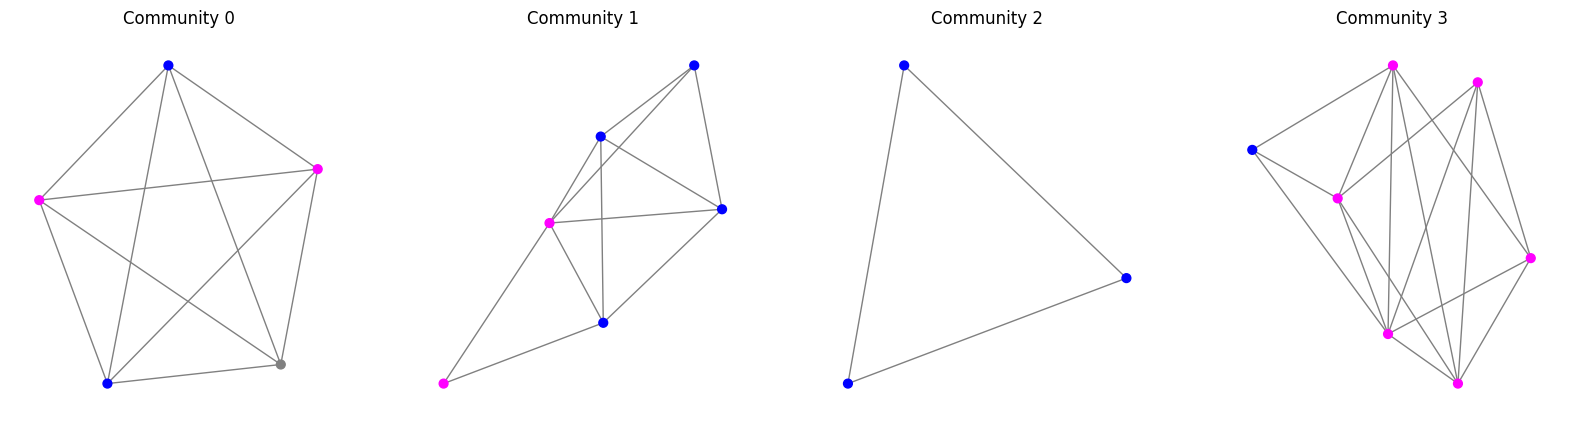

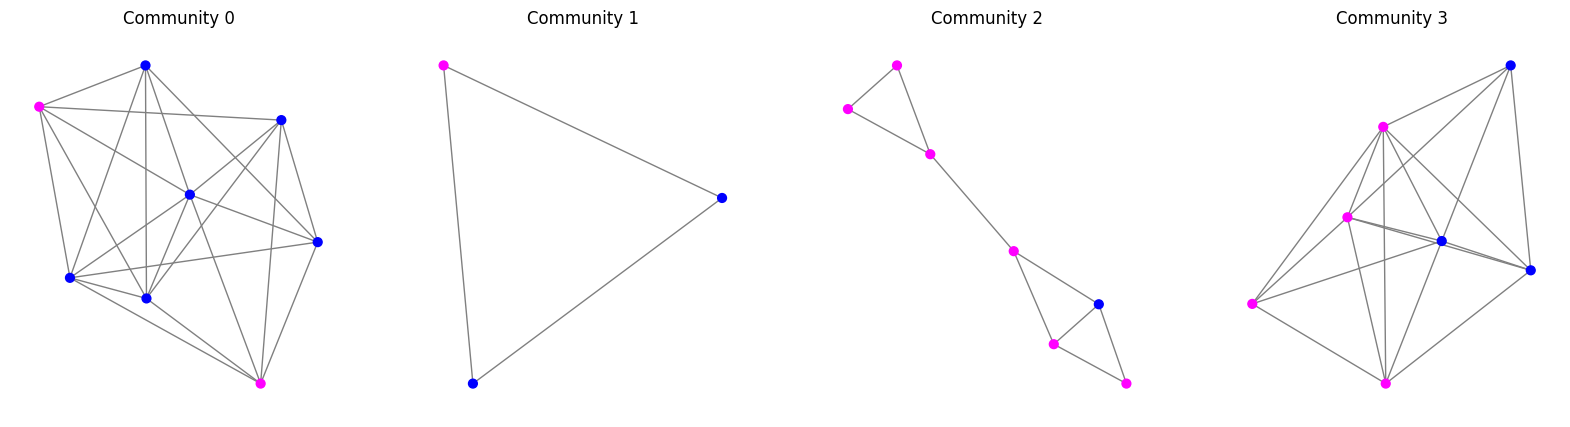

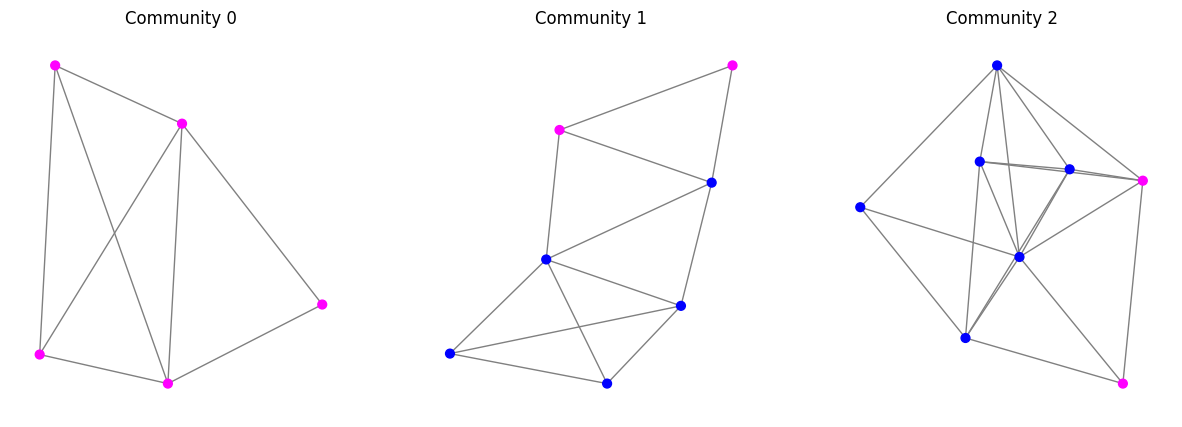

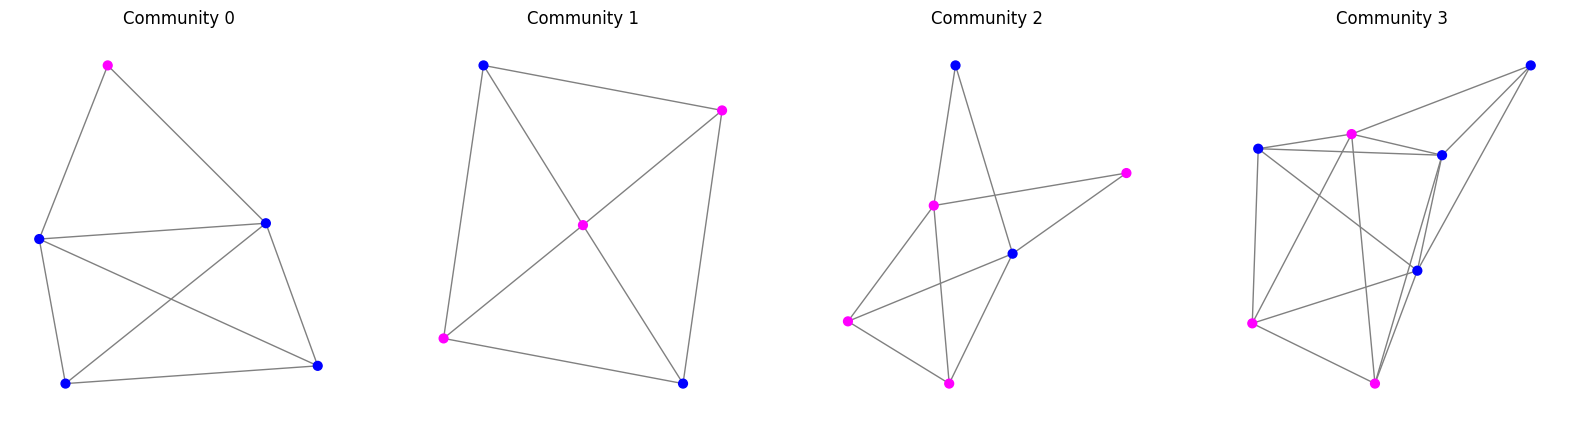

In [ ]:
for grade, nodes in group.items():
    tmin = time_to_timestamp(first_break[grade]) +20*60
    tmax = tmin + 10*60 # 10 minutes
   
    myG = nx.Graph()
    # Filter edges based on nodes and time range
    df_filtered = df[(df['u'].isin(nodes)) & (df['v'].isin(nodes)) & (df['time'] >= tmin) & (df['time'] <= tmax)]

    # Add nodes and edges to the graph
    #myG.add_nodes_from(nodes)
    for _, edge in df_filtered.iterrows():
        myG.add_edge(edge['u'], edge['v'], weight=edge['weight'], time=edge['time'])
    
    partition = community_louvain.best_partition(myG)

    # # Draw the graph
    # pos = nx.spring_layout(myG)
    # cmap = plt.get_cmap('viridis')
    # nx.draw_networkx_nodes(myG, pos, partition.keys(), node_size=40, 
    #                     cmap=cmap, node_color=list(partition.values()))
    # nx.draw_networkx_edges(myG, pos, alpha=0.5)
    # plt.title(f" {grade} Louvain Community Detection")
    # plt.show()

    # Create a dictionary to hold subgraphs
    subgraphs = {}
    for community_id in set(partition.values()):
        subgraphs[community_id] = nx.Graph()

    # Add nodes and edges to the corresponding subgraphs
    for node, community_id in partition.items():
        subgraphs[community_id].add_node(node)
        for neighbor in myG.neighbors(node):
            if partition[neighbor] == community_id:
                subgraphs[community_id].add_edge(node, neighbor)

    # Plot each subgraph in a subplot
    num_communities = len(subgraphs)
    fig, axes = plt.subplots(1, num_communities, figsize=(5*num_communities, 5))
    for ax, (community_id, subgraph) in zip(axes, subgraphs.items()):
        pos = nx.spring_layout(subgraph)
        node_colors = [gender_dict[node_gender[node]] for node in subgraph.nodes()]

        nx.draw(subgraph, pos, ax=ax, with_labels=False, node_size=40, node_color = node_colors, edge_color='gray')
        ax.set_title(f"Community {community_id}")

    plt.show()

c:\Users\Dell 5520\Anaconda3\lib\site-packages\ipykernel_launcher.py:80: RuntimeWarning: divide by zero encountered in true_divide


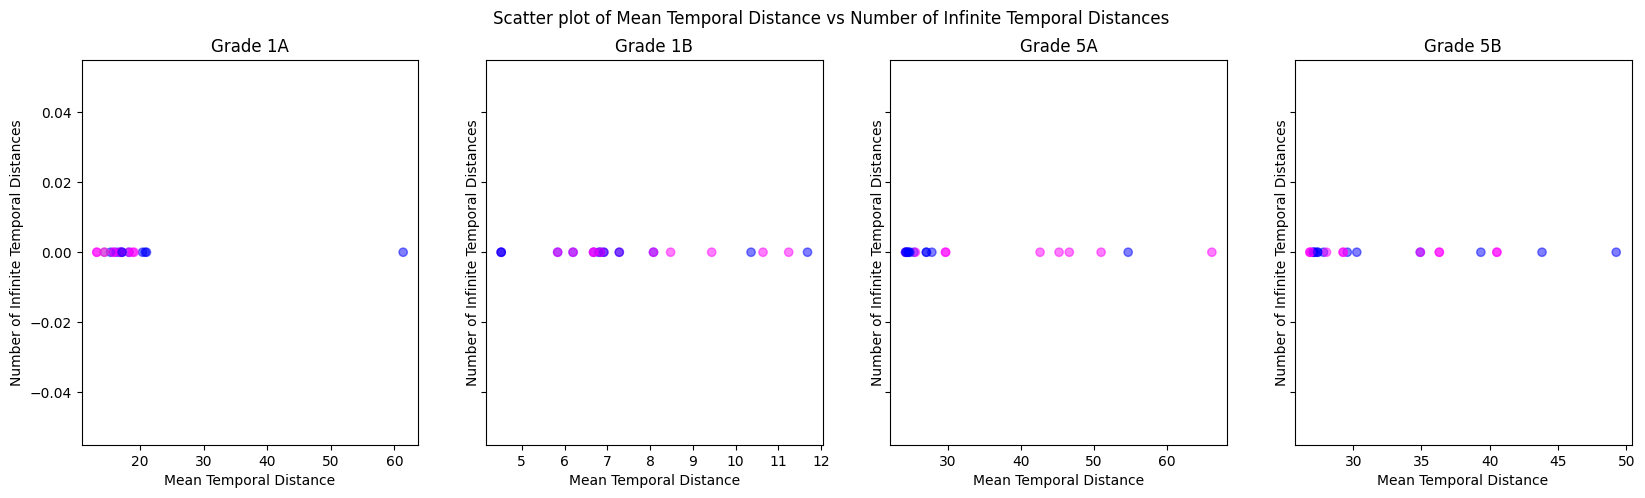

In [ ]:
h = 2

tmin_dict_here = {x: time_to_timestamp(first_break[x]) + 0*60 for x in group.keys()}
tmax_dict_here = {x: time_to_timestamp(first_break[x]) + 30*60 for x in group.keys()}

results = run_temporal_distance_analysis(tmin_dict_here, tmax_dict_here, h)

# Compute mean value and number of infs for each row of T_matrix
mean_values = {grade: [] for grade in group.keys()}
num_infs = {grade: [] for grade in group.keys()}
gender = {grade: [] for grade in group.keys()}

for result in results:
    T_matrix = result['T_matrix']

    finite_T_matrix_mean = [np.mean(row[np.isfinite(row)]) for row in T_matrix]

    mean_values[result['grade']].append(finite_T_matrix_mean)
    num_infs[result['grade']].append(np.sum(np.isinf(T_matrix), axis=1))
    gender[result['grade']].append(result['genders'])

# Create subplots for each grade
fig, axs = plt.subplots(1, len(group), figsize=(20, 5), sharey=True)

for ax, grade in zip(axs, group.keys()):
    mean_values_here = np.concatenate(mean_values[grade])
    num_infs_here = np.concatenate(num_infs[grade])
    gender_here = np.concatenate(gender[grade])

    node_colors = [gender_dict[g] for g in gender_here]
    ax.scatter(mean_values_here, num_infs_here, c=node_colors, alpha=0.5)
    ax.set_title(f'Grade {grade}')
    ax.set_xlabel('Mean Temporal Distance')
    ax.set_ylabel('Number of Infinite Temporal Distances')

plt.suptitle('Scatter plot of Mean Temporal Distance vs Number of Infinite Temporal Distances')
plt.show()




# Utils

In [13]:
G = nx.Graph()
for _, row in metadata.iterrows():
    if row['grade'] != "Teachers":
        G.add_node(row['id'], color=grade_dict_more[row['grade']])

for _, edge in df.iterrows():
    if node_grade[edge['u']] != "Teachers" and node_grade[edge['v']] != "Teachers":
        G.add_edge(edge['u'], edge['v'], weight=edge['weight'], time=edge['time'])


In [14]:
def timestamp_to_time(timestamp):

    is_day_2 = (timestamp > 117000)
    # Convert timestamp to seconds since start of the day
    seconds_since_start = (timestamp - (117240 if is_day_2 else d1_min))

    # Calculate hours, minutes, and seconds
    hours = 8 + (seconds_since_start // 3600)
    minutes = (30 if is_day_2 else 45) + ((seconds_since_start % 3600) // 60)
    seconds = seconds_since_start % 60
    # Adjust for overflow in minutes
    if minutes >= 60:
        hours += 1
        minutes -= 60
    return f"{int(hours):02}:{int(minutes):02}:{int(seconds):02}"

def time_to_timestamp(time_str, day=1):
    # Parse the time string
    hours, minutes, seconds = map(int, time_str.split(':'))
    # Calculate total seconds since start of the day
    total_seconds = (hours - 8) * 3600 + (minutes - 45) * 60 + seconds
    # Convert to timestamp
    timestamp = (d1_min if day==1 else 117240) + total_seconds
    return timestamp

In [15]:
def preprocess_temporal_adjacency(df):
    """Preprocess to create a dictionary of adjacency lists by time."""
    temporal_adj = defaultdict(lambda: defaultdict(list))
    for _, row in df.iterrows():
        temporal_adj[row['time']][row['u']].append(row['v'])
        temporal_adj[row['time']][row['v']].append(row['u'])
    return temporal_adj

def temporal_distance_optimized(temporal_adj, G, source, tmin, tmax, h):
    """
    Optimized temporal distance calculation.
    """
    # Initialize D, T, and R
    D = {node: float('inf') for node in G.nodes()}  # Distance
    T = {node: float('inf') for node in G.nodes()}  # First time of reachability
    R = {node: False for node in G.nodes()}  # Reachable

    D[source] = 0
    T[source] = 0
    R[source] = True

    # Iterate over time windows
    for t in range(tmin, tmax + 1, 20):
        stack = [(node, 0) for node in G.nodes() if R[node]]

        while stack:
            node, depth = stack.pop()
            if depth < h:
                neighbors_t = temporal_adj[t].get(node, [])
                for neighbor in neighbors_t:
                    if not R[neighbor]:
                        R[neighbor] = True
                        T[neighbor] = (t - tmin) / 20
                        D[neighbor] = D[node] + 1
                        stack.append((neighbor, depth + 1))
                    elif T[neighbor] == (t - tmin) / 20 and D[neighbor] > D[node] + 1:
                        D[neighbor] = D[node] + 1
                        stack.append((neighbor, depth + 1))

    return T, D

def run_temporal_distance_analysis(tmin_dict, tmax_dict, h):
    results = []

    for grade, nodes in group.items():
        subgraph = G.subgraph(nodes)
        df_group = df_original[df_original['u'].isin(nodes) & df_original['v'].isin(nodes)]
        temporal_adj = preprocess_temporal_adjacency(df_group)

        # Filter nodes that appear at least once in the given timeframe
        nodes_in_timeframe = set(df_group[(df_group['time'] >= tmin_dict[grade]) & (df_group['time'] <= tmax_dict[grade])]['u']).union(
            set(df_group[(df_group['time'] >= tmin_dict[grade]) & (df_group['time'] <= tmax_dict[grade])]['v'])
        )
        nodes = list(nodes_in_timeframe)

        T = np.zeros((len(nodes), len(nodes)))
        D = np.zeros((len(nodes), len(nodes)))

        tmin = tmin_dict[grade]
        tmax = tmax_dict[grade]

        for node_id, source in enumerate(nodes):
            temporal_distances, node_distances = temporal_distance_optimized(
                temporal_adj, subgraph, source, tmin, tmax, h
            )
            T[node_id, :] = [temporal_distances[node] for node in nodes]
            D[node_id, :] = [node_distances[node] for node in nodes]

        inf_temporal = np.sum(np.isinf(T))
        inf_node = np.sum(np.isinf(D))

        avg_temporal = np.sum(T[np.isfinite(T)]) / (T.size - inf_temporal)
        avg_node = np.sum(D[np.isfinite(D)]) / (D.size - inf_node)
        results.append({
            'grade': grade,
            'inf_temporal': inf_temporal,
            'inf_node': inf_node,
            'avg_temporal': avg_temporal,
            'avg_node': avg_node,
            'efficiency': np.sum(1/T[np.isfinite(T)]),
            'T_matrix': T,
            'D_matrix': D,
            'genders': [node_gender[node] for node in nodes]
        })

    return results